In [1]:
import numpy as np
from cryodrgn import mrc
import matplotlib.pylab as plt
from math import ceil

### Analyzing 2D class average from Job 58
* Inputs are 10,000 real particles, and the 10,000 syn particles that amplitude normalized

In [2]:
def calculate_distribution(class_average_cs):
    class_average = np.load(class_average_cs)
    all_classes = list(set(class_average['alignments2D/class']))
    all_datasets = list(set([str(i).split('/')[-1].split('_')[0] for i in list(class_average['blob/path'])]))
    result = {}
    
    for c in all_classes:
        result[c] = {}
        for ds in all_datasets:
            result[c][ds] = 0
    
    for particle_index in range(class_average.shape[0]):
        c = class_average[int(particle_index)]['alignments2D/class']
        d = str(class_average[int(particle_index)]['blob/path']).split('/')[-1].split('_')[0]
        result[c][d]+=1
    
    return result

In [27]:
def plot_dist(particle_distribution, total, labels, mrc_file, num_columns=6):
    
    x, _ =mrc.parse_mrc(mrc_file)
    
    num_classes = len(particle_distribution.keys())
    datasets = list(particle_distribution[1].keys())
    rows = ceil(num_classes/num_columns)
    
    class_IDs = list(particle_distribution.keys())
    
    figure, axes = plt.subplots(nrows = rows*2, ncols = num_columns, figsize = (10.5,7.5))
    [axi.yaxis.set_visible(False) for axi in axes.ravel()]
    [axi.xaxis.set_visible(False) for axi in axes.ravel()]
    total=10000
    for c in class_IDs:
        axes[((c-1)//6)*2][(c-1)%6].imshow(x[c], cmap='gray')
        axes[((c-1)//6)*2][(c-1)%6].set_xticks([])
        axes[((c-1)//6)*2][(c-1)%6].set_yticks([])
        axes[((c-1)//6)*2+1][(c-1)%6].bar([labels[i] for i in datasets], [particle_distribution[c][datasets[0]], particle_distribution[c][datasets[1]]])
        axes[((c-1)//6)*2+1][(c-1)%6].xaxis.set_visible(True)
        axes[((c-1)//6)*2+1][(c-1)%6].set_yticks([0, total, total*2])
        axes[((c-1)//6)*2+1][(c-1)%6].yaxis.set_visible(False)
        axes[((c-1)//6)*2+1][(c-1)%6].text(0.5,0.8,'class ' + str(c) + '\n total = ' + str(particle_distribution[c][datasets[0]]+particle_distribution[c][datasets[1]]), 
                                           horizontalalignment='center',verticalalignment='center', transform=axes[((c-1)//6)*2+1][(c-1)%6].transAxes)
        if((c-1)%6 == 0):
            axes[((c-1)//6)*2+1][(c-1)%6].yaxis.set_visible(True)
    return figure

In [28]:
class_average_cs = '/cold2/jhdavis/apohfh_gan/csparc_testing/P52/exports/groups/P52_J58_particles/P52_J58_particles_exported.cs'
mrc_file = '/cold2/jhdavis/apohfh_gan/csparc_testing/P52/exports/groups/P52_J58_class_averages/J58/cryosparc_P52_J58_020_class_averages.mrc'

In [29]:
particle_distribution = calculate_distribution(class_average_cs)

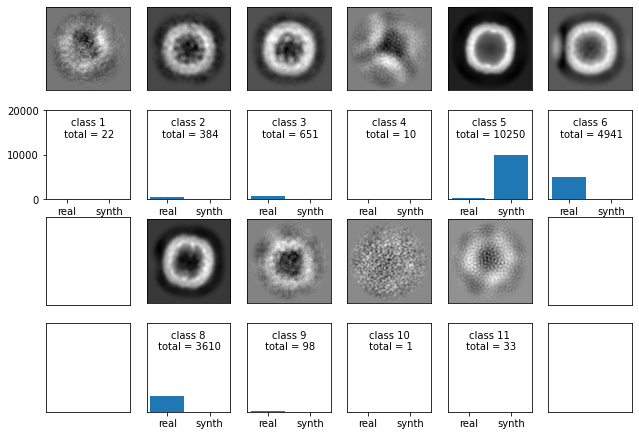

In [30]:
f = plot_dist(particle_distribution, 10000, {'red':'real', 'apoHFH':'synth'}, mrc_file)

In [10]:
f.savefig('./analysis.png')